## Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

### define dataset

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### preprocessing

In [16]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [17]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


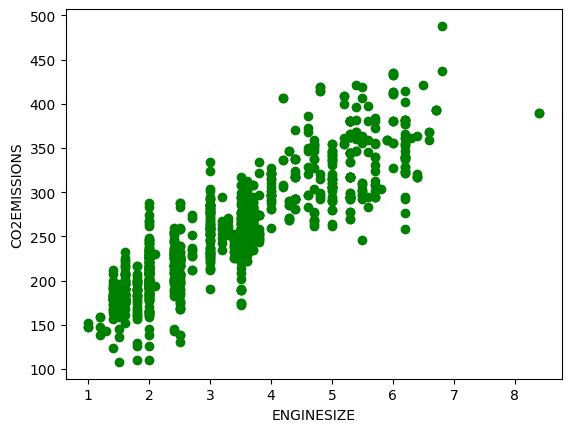

In [18]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [19]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((849, 4), (218, 4))

### model definition

In [32]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

x_train[:3]

array([[2.4],
       [3.5],
       [3.5]])

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [33]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

x_train_poly[:3]

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25]])

In [34]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"intercept : {mymodel.intercept_[0]:.4f} | coefficient : {mymodel.coef_[0][0]}, {mymodel.coef_[0][1]:.4f}, {mymodel.coef_[0][2]:.4f}")

intercept : 109.2932 | coefficient : 0.0, 48.8665, -1.2651


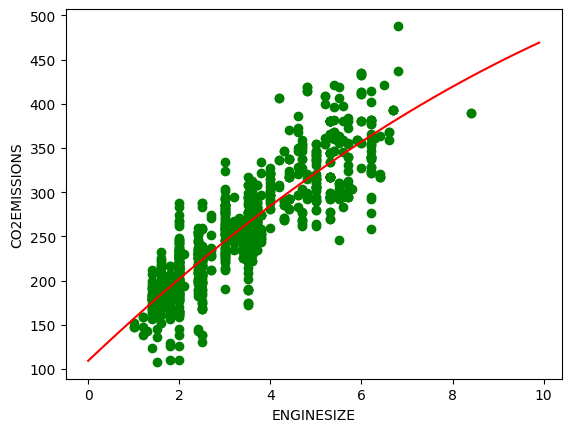

In [35]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 10, 0.1)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2)
plt.plot(x, y, "r-")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### model evaluation

In [45]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
y_test_pred = mymodel.predict(x_test_poly)

In [39]:
mse = np.mean((y_test - y_test_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 878.84478 | Mean Absolute Error : 23.46153 | R2 Score : 0.75114


#### practice : Try to use a polynomial regression with the dataset but this time with degree three.

### model definition

In [40]:
poly_3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly_3.fit_transform(x_train)

x_train[:3], x_train_poly3[:3]

(array([[2.4],
        [3.5],
        [3.5]]),
 array([[ 1.   ,  2.4  ,  5.76 , 13.824],
        [ 1.   ,  3.5  , 12.25 , 42.875],
        [ 1.   ,  3.5  , 12.25 , 42.875]]))

In [42]:
model = LinearRegression()
model.fit(x_train_poly3, y_train)

print(f"intercept : {model.intercept_[0]:.4f} | coefficient : {model.coef_[0][0]}, {model.coef_[0][1]:.4f}, {model.coef_[0][2]:.4f}, {model.coef_[0][3]:.4f}")

intercept : 138.4674 | coefficient : 0.0, 21.5371, 6.2174, -0.6164


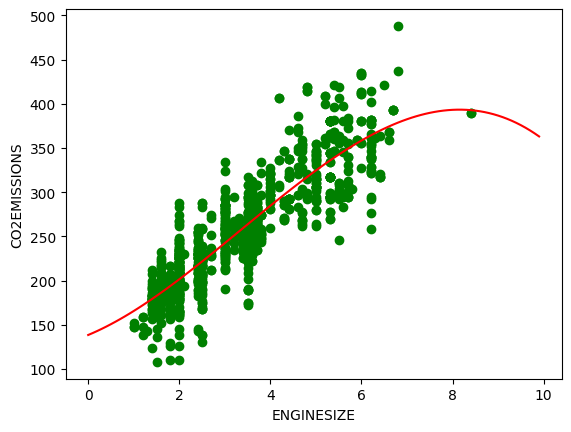

In [43]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
my_x = np.arange(0, 10, 0.1)
my_y = model.intercept_ + model.coef_[0][1] * my_x + model.coef_[0][2] * np.pow(my_x, 2) + model.coef_[0][3] * np.pow(my_x, 3)
plt.plot(my_x, my_y, "r-")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### model evaluation

In [48]:
x_test_poly3 = poly_3.fit_transform(x_test)
y_test_pred3 = model.predict(x_test_poly3)

In [49]:
my_mse = np.mean((y_test - y_test_pred3) ** 2)
my_mae = np.mean(np.absolute(y_test - y_test_pred3))
my_r2 = r2_score(y_test, y_test_pred3)

print(f"mean squared error : {my_mse:.5f} | mean absolute error : {my_mae:.5f} | r2 score : {my_r2:.5f}".title())

Mean Squared Error : 889.55567 | Mean Absolute Error : 23.62811 | R2 Score : 0.74811
